In [ ]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from matplotlib import pyplot as plt
import scipy.optimize as op

# K-means Clustering

In [176]:
# data = loadmat('data/ex7data1.mat')
data = loadmat('data/ex7data2.mat')
x = data['X']

In [243]:
def kMeansInitCentroids(X, K):
    rand = np.random.choice(X.shape[0],K,replace=False)
    randx = X[rand,0]
    randy = X[rand,1]
    centroids = np.c_[randx,randy]
    return centroids


def findClosestCentroids(X, centroids):
    c = np.zeros( (X.shape[0], 1) )    
    for idx1, p in enumerate(X):
        min = 100000
        for idx2, cent in enumerate(centroids):
            if min > np.linalg.norm(p-cent):
                min = np.linalg.norm(p-cent)
                c[idx1] = idx2
    return c


def computeMeans(X, index, K):
    lengths = np.zeros((K,1))
    sums = np.zeros((K,2))
    index = index.astype(int)
    
    for idx, p in enumerate(X):
        sums[index[idx], 0] += p[0]
        sums[index[idx], 1] += p[1]
        lengths[index[idx]]+=1
        
    return sums/lengths

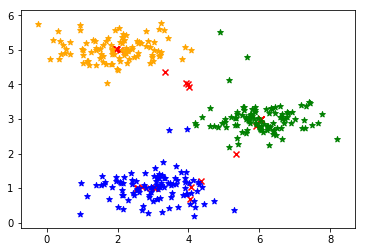

In [244]:
K = 3
iter_cnt = 15

centroids = kMeansInitCentroids(x,K)

for i in range(iter_cnt):
    index = findClosestCentroids(x,centroids)
    centroids = computeMeans(x,index,K)
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='r')

nx = np.c_[x,index]
for n in nx:
    if n[2] == 0:
        plt.scatter(n[0], n[1], marker='*', c='blue')
    elif n[2] == 1:
        plt.scatter(n[0], n[1], marker='*', c='green')
    else:
        plt.scatter(n[0], n[1], marker='*', c='orange')

In [245]:
img = plt.imread('data/bird_small.png')
img_data = img.reshape(128*128,3)


In [246]:
def kMeansInitCentroids3D(X, K):
    rand = np.random.choice(X.shape[0],K,replace=False)
    randx = X[rand,0]
    randy = X[rand,1]
    randz = X[rand,2]
    centroids = np.c_[randx,randy,randz]
    return centroids


def findClosestCentroids3D(X, centroids):
    c = np.zeros( (X.shape[0], 1) )    
    for idx1, p in enumerate(X):
        min = 999999999
        for idx2, cent in enumerate(centroids):
            if min > np.linalg.norm(p-cent):
                min = np.linalg.norm(p-cent)
                c[idx1] = idx2
    return c


def computeMeans3D(X, index, K):
    lengths = np.zeros((K,1))
    sums = np.zeros((K,3))
    index = index.astype(int)
    
    for idx, p in enumerate(X):
        sums[index[idx], 0] += p[0]
        sums[index[idx], 1] += p[1]
        sums[index[idx], 2] += p[2]
        lengths[index[idx]]+=1
        
    return sums/lengths

In [238]:
K = 16
iter_cnt = 100

centroids = kMeansInitCentroids3D(img_data,K)

for i in range(iter_cnt):
    index = findClosestCentroids3D(img_data,centroids)
    centroids = computeMeans3D(img_data,index,K)

nimg = np.c_[img_data,index]

<Figure size 432x288 with 0 Axes>

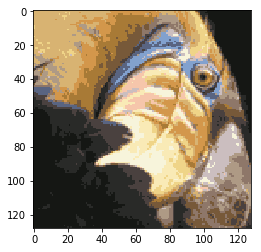

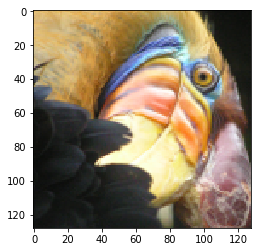

<Figure size 432x288 with 0 Axes>

In [242]:
ans = np.zeros((16384, 3))

for idx, dum in enumerate(nimg):
    ans[idx] = centroids[dum.astype(int)[3]]

    
plt.imshow(ans.reshape((128,128,3)))
plt.figure()
plt.imshow(img)
plt.figure()

# Principal Component Analysis 

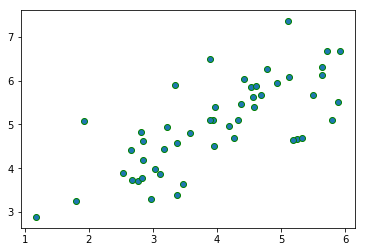

In [253]:
d2 = loadmat('data/ex7data1.mat')
d2x = d2['X']
plt.scatter(d2x[:,0],d2x[:,1],facecolors=None, edgecolors='g')